In [1]:
cd ../../../..

/nfs/nhome/live/thinh/code/ProjectAeon/aeon


In [2]:
import datajoint as dj

In [3]:
_db_prefix = "aeon_"

lab = dj.create_virtual_module("lab", _db_prefix + "lab")
subject = dj.create_virtual_module("subject", _db_prefix + "subject")
acquisition = dj.create_virtual_module("acquisition", _db_prefix + "acquisition")
qc = dj.create_virtual_module("qc", _db_prefix + "qc")
tracking = dj.create_virtual_module("tracking", _db_prefix + "tracking")
analysis = dj.create_virtual_module("analysis", _db_prefix + "analysis")

[2022-07-28 19:53:12,486][INFO]: Connecting thinh@aeon-db2:3306
[2022-07-28 19:53:12,497][INFO]: Connected thinh@aeon-db2:3306


In [4]:
lab.schema.spawn_missing_classes()
subject.schema.spawn_missing_classes()
acquisition.schema.spawn_missing_classes()
tracking.schema.spawn_missing_classes()
analysis.schema.spawn_missing_classes()

# High level diagram

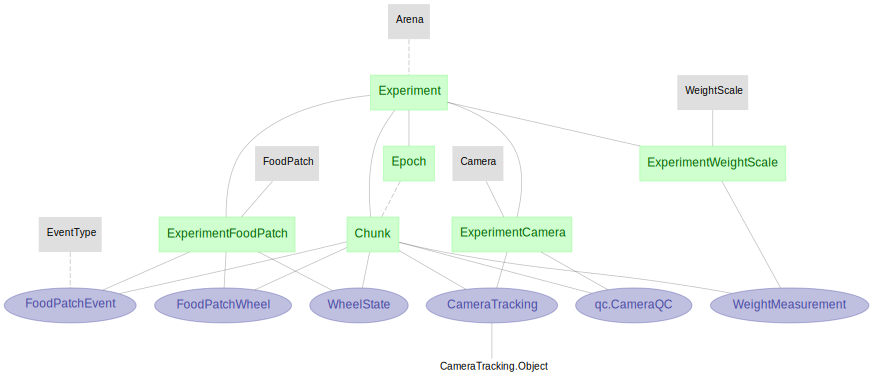

In [12]:
diagram = (
    dj.Diagram(acquisition.Epoch)
    + lab.Arena
    + lab.FoodPatch
    + lab.Camera
    + lab.WeightScale
    + acquisition.Experiment
    + acquisition.ExperimentCamera
    + acquisition.FoodPatchWheel
    + acquisition.FoodPatchEvent
    + acquisition.WheelState
    + acquisition.EventType
    + acquisition.WeightMeasurement
    + qc.CameraQC
    + tracking.CameraTracking.Object
)

diagram

In [13]:
diagram.save("aeon/dj_pipeline/docs/datajoint_overview_diagram.svg")

# Analysis pipeline diagram

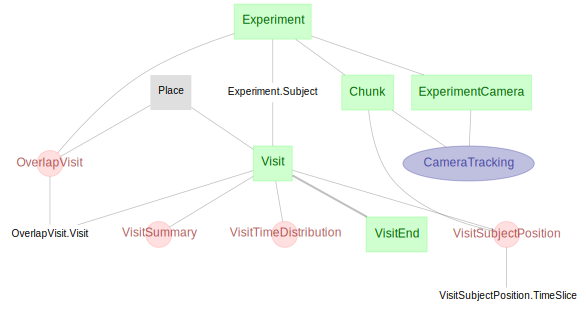

In [14]:
analysis_diagram = (
    dj.Diagram(analysis.Visit)
    + analysis.Place
    + analysis.VisitEnd
    + analysis.OverlapVisit.Visit
    + acquisition.Experiment
    + tracking.CameraTracking
    + analysis.VisitSubjectPosition.TimeSlice
    + analysis.VisitTimeDistribution
    + analysis.VisitSummary
)

analysis_diagram

In [15]:
diagram.save("aeon/dj_pipeline/docs/datajoint_analysis_diagram.svg")

In [19]:
ls aeon/dj_pipeline/docs/

datajoint_analysis_diagram.svg  datajoint_overview_diagram.svg  notebooks/
